###  Obtencion data YahooFinance API - Inicios y definición 

In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import kurtosis, skew
import plotly.express as px
import plotly.io as pio
import seaborn as sns
import pandas as pd
import time
import numpy as np

In [2]:
symbols = ['EC', 'CIB', 'AVAL', 'CMSA', 'NU', 'ICAP']

dataframes = {}

In [3]:
start_date = '2021-12-29'  

for symbol in symbols:
    print(f"Descargando datos de: {symbol}")
    
    try:
        ticker = yf.Ticker(symbol)

        hist = ticker.history(start=start_date)  
        
        if hist.empty:
            print(f" No hay datos disponibles para: {symbol}")
            continue

        hist['Symbol'] = symbol
        dataframes[symbol] = hist

        time.sleep(1)

    except Exception as e:
        print(f"Error al descargar {symbol}: {e}")

if dataframes:
    df_acciones = pd.concat(dataframes.values())
else:
    print(" No se pudo descargar ningún dato.")

df_acciones


Descargando datos de: EC
Descargando datos de: CIB
Descargando datos de: AVAL
Descargando datos de: CMSA
Descargando datos de: NU
Descargando datos de: ICAP


,Open,High,Low,Close,Volume,Dividends,Stock Splits,Symbol,Capital Gains
Date,,,,,,,,,
2021-12-29 00:00:00-05:00,8.187858,8.212281,8.016896,8.077953,350100,0.0,0.0,EC,NaN
2021-12-30 00:00:00-05:00,8.139012,8.206175,7.943627,7.949733,367900,0.0,0.0,EC,NaN
2021-12-31 00:00:00-05:00,7.961944,7.986367,7.852039,7.870357,558700,0.0,0.0,EC,NaN
2022-01-03 00:00:00-05:00,7.913097,8.187857,7.913097,8.175646,454200,0.0,0.0,EC,NaN
2022-01-04 00:00:00-05:00,8.242810,8.297762,8.132906,8.163435,410500,0.0,0.0,EC,NaN
...,...,...,...,...,...,...,...,...,...
2025-06-10 00:00:00-04:00,25.605000,25.740000,25.604000,25.671000,6400,0.0,0.0,ICAP,0.0
2025-06-11 00:00:00-04:00,25.809999,25.860001,25.590000,25.614000,6400,0.0,0.0,ICAP,0.0
2025-06-12 00:00:00-04:00,25.650000,25.790001,25.639999,25.724001,5400,0.0,0.0,ICAP,0.0


In [4]:
print(df_acciones.columns)
print(df_acciones['Symbol'].unique())

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits',
       'Symbol', 'Capital Gains'],
      dtype='object')
['EC' 'CIB' 'AVAL' 'CMSA' 'NU' 'ICAP']


In [5]:
df_acciones.reset_index(inplace= True)
df_acciones_ordenadas = df_acciones.pivot_table(values='Close', index='Date', columns='Symbol')
df_acciones_ordenadas.reset_index(inplace= True)
df_acciones_ordenadas

Symbol,Date,AVAL,CIB,CMSA,EC,ICAP,NU
0,2021-12-29 00:00:00-05:00,4.176003,19.961851,21.178480,8.077953,22.438782,9.32
1,2021-12-30 00:00:00-05:00,4.151912,19.955540,21.243521,7.949733,22.431345,9.40
2,2021-12-31 00:00:00-05:00,4.103728,19.942913,21.487419,7.870357,22.565947,9.38
3,2022-01-03 00:00:00-05:00,4.127820,19.974480,21.357340,8.175646,22.806902,9.98
4,2022-01-04 00:00:00-05:00,4.167974,19.848215,21.121572,8.163435,23.378782,9.74
...,...,...,...,...,...,...,...
864,2025-06-10 00:00:00-04:00,2.830000,42.070000,21.040001,9.020000,25.671000,11.97
865,2025-06-11 00:00:00-04:00,2.820000,42.709999,21.000000,9.310000,25.614000,12.76
866,2025-06-12 00:00:00-04:00,2.810000,42.650002,21.020000,9.330000,25.724001,12.00
867,2025-06-13 00:00:00-04:00,2.910000,42.529999,20.870001,9.670000,25.312000,11.90


In [6]:
# Interpolar los valores faltante, manejo de valores vacios
df_acciones_ordenadas.iloc[:, :] = df_acciones_ordenadas.interpolate(method='linear', limit_direction='both')
df_acciones_ordenadas

Symbol,Date,AVAL,CIB,CMSA,EC,ICAP,NU
0,2021-12-29 00:00:00-05:00,4.176003,19.961851,21.178480,8.077953,22.438782,9.32
1,2021-12-30 00:00:00-05:00,4.151912,19.955540,21.243521,7.949733,22.431345,9.40
2,2021-12-31 00:00:00-05:00,4.103728,19.942913,21.487419,7.870357,22.565947,9.38
3,2022-01-03 00:00:00-05:00,4.127820,19.974480,21.357340,8.175646,22.806902,9.98
4,2022-01-04 00:00:00-05:00,4.167974,19.848215,21.121572,8.163435,23.378782,9.74
...,...,...,...,...,...,...,...
864,2025-06-10 00:00:00-04:00,2.830000,42.070000,21.040001,9.020000,25.671000,11.97
865,2025-06-11 00:00:00-04:00,2.820000,42.709999,21.000000,9.310000,25.614000,12.76
866,2025-06-12 00:00:00-04:00,2.810000,42.650002,21.020000,9.330000,25.724001,12.00
867,2025-06-13 00:00:00-04:00,2.910000,42.529999,20.870001,9.670000,25.312000,11.90


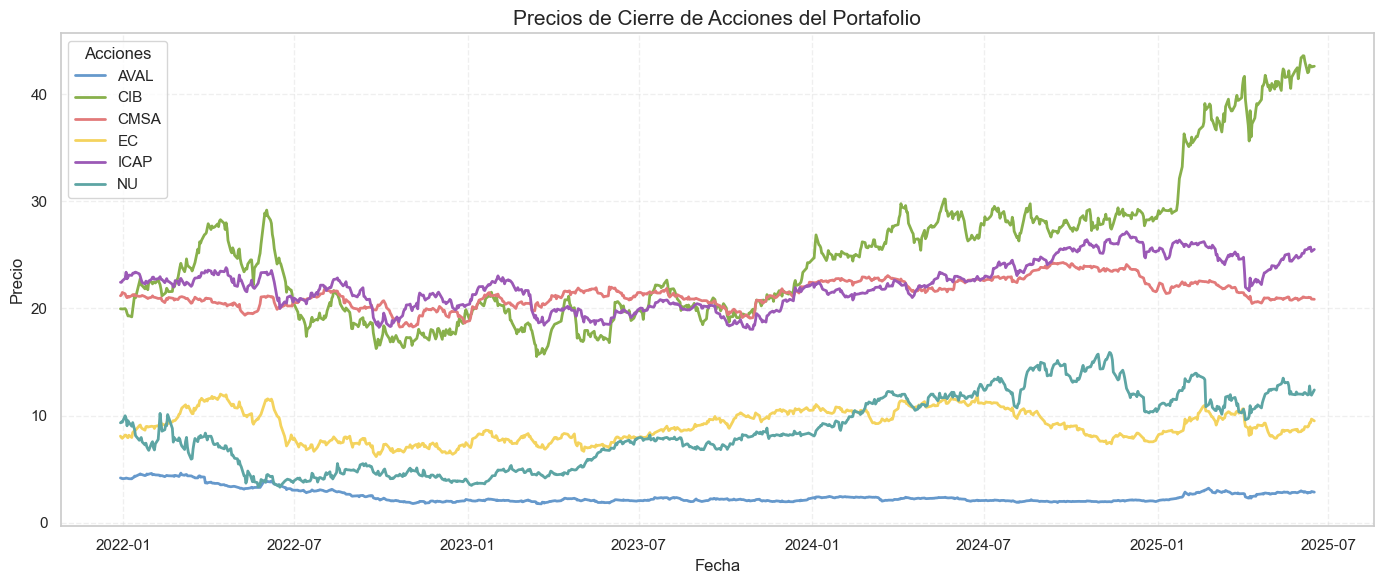

In [7]:
# Gráfico estatico y gräfico Interactivo
df_plot = df_acciones_ordenadas.copy()
df_plot['Date'] = pd.to_datetime(df_plot['Date'])
df_plot.set_index('Date', inplace=True)

colors= [
    '#6699CC',  # azul pastel intenso
    '#88B04B',  # verde pastel intenso
    '#E27A7A',  # rojo pastel intenso
    '#F4D35E',  # amarillo pastel intenso
    '#9B59B6',  # morado pastel intenso
    '#5DA5A4',  # aguamarina pastel intenso
    '#B0724A',  # marrón pastel intenso
]


sns.set(style="whitegrid")

plt.figure(figsize=(14, 6))

for i, col in enumerate(df_plot.columns):
    sns.lineplot(x=df_plot.index, y=df_plot[col], label=col, color=colors[i % len(colors)], linewidth=2)

plt.title("Precios de Cierre de Acciones del Portafolio", fontsize=15)
plt.xlabel("Fecha")
plt.ylabel("Precio")
plt.legend(title="Acciones", loc='best')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

pio.renderers.default = 'browser'

df = df_acciones_ordenadas.copy()
df['Date'] = pd.to_datetime(df['Date'])

df_melted = df.melt(id_vars='Date', var_name='Acción', value_name='Precio')


fig = px.line(
    df_melted,
    x='Date',
    y='Precio',
    color='Acción',
    title='Precios de Cierre de Acciones del Portafolio',
    color_discrete_sequence=colors
)

fig.update_layout(
    template='plotly_white',
    hovermode='x unified',
    width=1000,
    height=600,
    xaxis_title="Fecha",
    yaxis_title="Precio"
)

# Mostrar en navegador
fig.show()

In [8]:
df_rend = df_acciones_ordenadas.copy()
df_rend['Date'] = pd.to_datetime(df_rend['Date'])
df_rend.set_index('Date', inplace=True)

# Calculamos los rendimientos logarítmicos para cada columna
df_rendimientos = np.log(df_rend / df_rend.shift(1))*100

# Renombramos las columnas con sufijo " Rendimiento"
df_rendimientos.columns = [f"{col}_Rendimiento" for col in df_rendimientos.columns]

# Si deseas unirlo con el DataFrame original:
df_completo = pd.concat([df_rend, df_rendimientos], axis=1).reset_index()

df_completo

,Date,AVAL,CIB,CMSA,EC,ICAP,NU,AVAL_Rendimiento,CIB_Rendimiento,CMSA_Rendimiento,EC_Rendimiento,ICAP_Rendimiento,NU_Rendimiento
0,2021-12-29 00:00:00-05:00,4.176003,19.961851,21.178480,8.077953,22.438782,9.32,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-12-30 00:00:00-05:00,4.151912,19.955540,21.243521,7.949733,22.431345,9.40,-0.578556,-0.031622,0.306636,-1.600023,-0.033148,0.854705
2,2021-12-31 00:00:00-05:00,4.103728,19.942913,21.487419,7.870357,22.565947,9.38,-1.167310,-0.063294,1.141566,-1.003489,0.598267,-0.212987
3,2022-01-03 00:00:00-05:00,4.127820,19.974480,21.357340,8.175646,22.806902,9.98,0.585341,0.158160,-0.607214,3.805629,1.062123,6.200327
4,2022-01-04 00:00:00-05:00,4.167974,19.848215,21.121572,8.163435,23.378782,9.74,0.968075,-0.634136,-1.110056,-0.149468,2.476566,-2.434195
...,...,...,...,...,...,...,...,...,...,...,...,...,...
864,2025-06-10 00:00:00-04:00,2.830000,42.070000,21.040001,9.020000,25.671000,11.97,2.504601,0.190336,0.190299,1.002796,0.574274,0.418587
865,2025-06-11 00:00:00-04:00,2.820000,42.709999,21.000000,9.310000,25.614000,12.76,-0.353982,1.509817,-0.190299,3.164475,-0.222284,6.391175
866,2025-06-12 00:00:00-04:00,2.810000,42.650002,21.020000,9.330000,25.724001,12.00,-0.355240,-0.140575,0.095195,0.214587,0.428535,-6.140865
867,2025-06-13 00:00:00-04:00,2.910000,42.529999,20.870001,9.670000,25.312000,11.90,3.496865,-0.281763,-0.716163,3.579331,-1.614584,-0.836828


In [9]:
df_completo[['AVAL', 'CIB', 'CMSA', 'EC', 'ICAP', 'NU', 'AVAL_Rendimiento',
       'CIB_Rendimiento', 'CMSA_Rendimiento', 'EC_Rendimiento',
       'ICAP_Rendimiento', 'NU_Rendimiento']].to_excel(r'..\data\processed\acciones_yahoofinance_etl.xlsx')

In [10]:
df_rend_only = df_completo.filter(like='Rendimiento')

# Matriz de covarianza
matriz_covarianza = df_rend_only.cov()

# Matriz de correlación
matriz_correlacion = df_rend_only.corr()

# Mostrar resultados
print("Matriz de Covarianza:\n", matriz_covarianza)
print("\nMatriz de Correlación:\n", matriz_correlacion)


Matriz de Covarianza:
                   AVAL_Rendimiento  CIB_Rendimiento  CMSA_Rendimiento  \
AVAL_Rendimiento          5.489853         2.455490          0.308328   
CIB_Rendimiento           2.455490         4.410956          0.413958   
CMSA_Rendimiento          0.308328         0.413958          0.639206   
EC_Rendimiento            2.305859         2.952811          0.385047   
ICAP_Rendimiento          0.892948         1.130080          0.430403   
NU_Rendimiento            1.061906         1.842941          0.596513   

                  EC_Rendimiento  ICAP_Rendimiento  NU_Rendimiento  
AVAL_Rendimiento        2.305859          0.892948        1.061906  
CIB_Rendimiento         2.952811          1.130080        1.842941  
CMSA_Rendimiento        0.385047          0.430403        0.596513  
EC_Rendimiento          6.180719          1.383987        1.567210  
ICAP_Rendimiento        1.383987          1.495261        1.688990  
NU_Rendimiento          1.567210          1.688990 

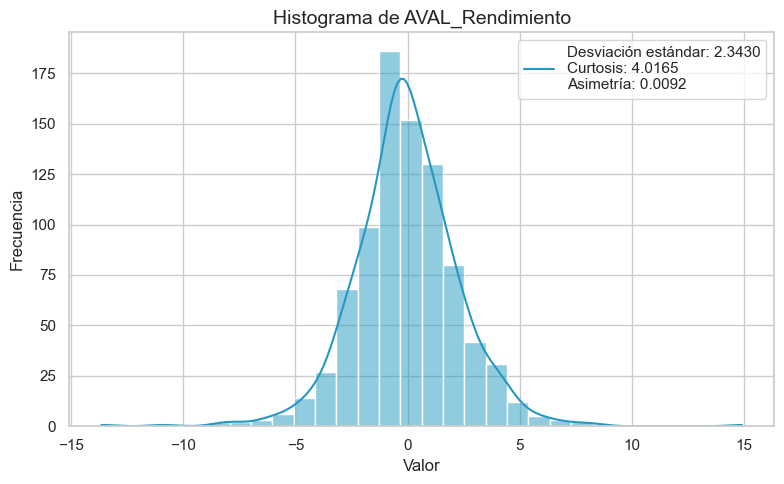

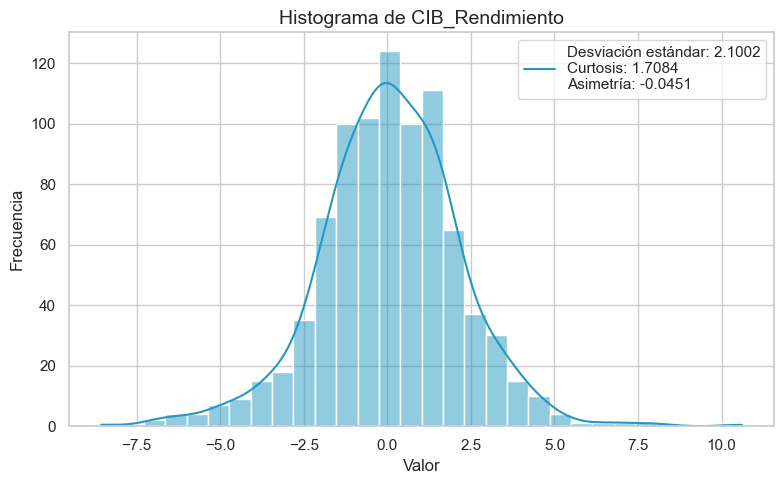

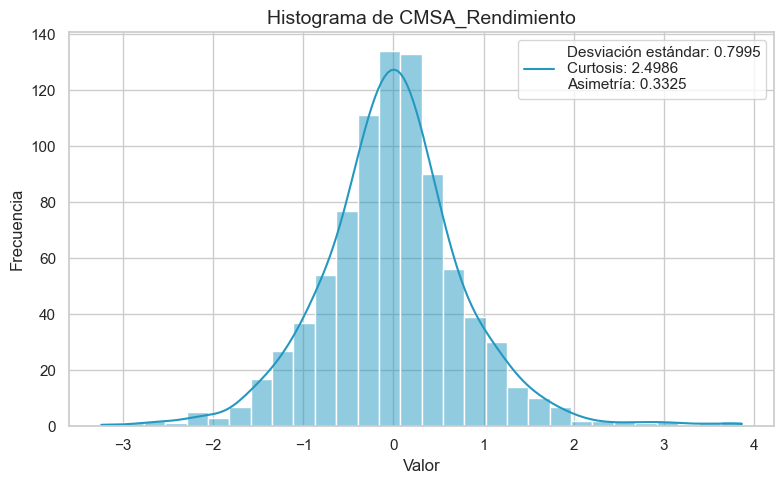

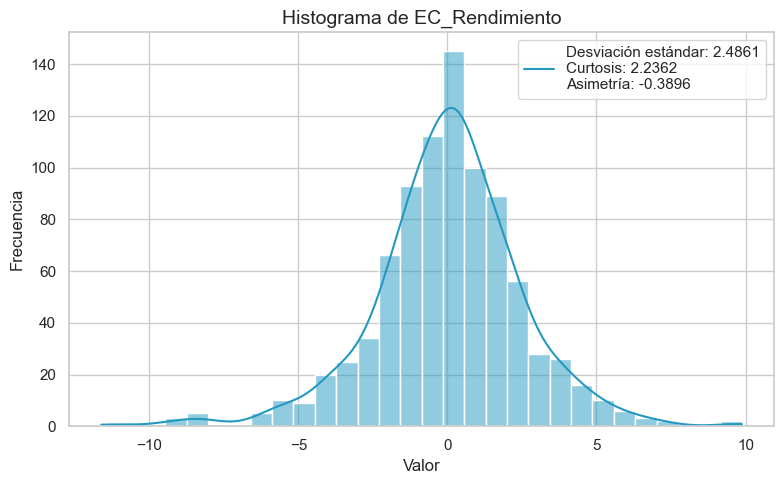

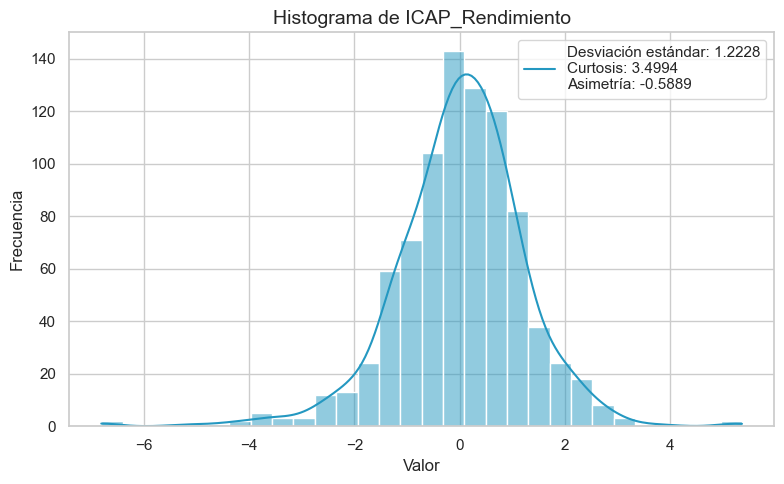

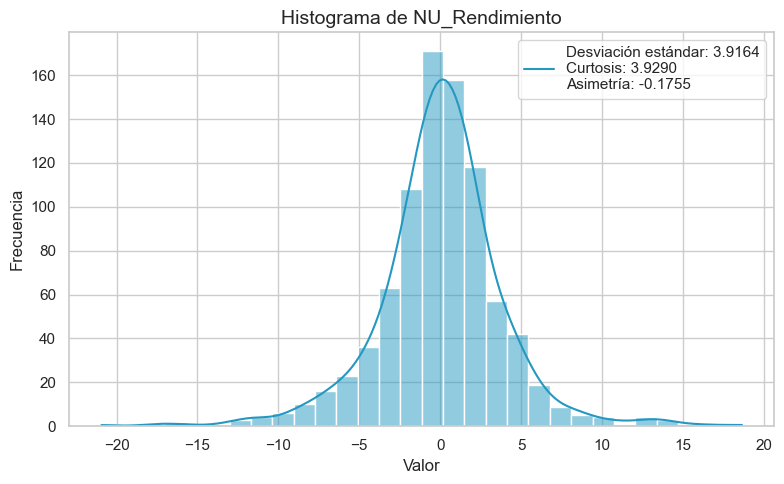

In [ ]:
sns.set(style="whitegrid")

# Iteración por columna (Acción)
for columna in df_rend_only.columns:
    datos = df_rend_only[columna].dropna()

    # Calculo de estadisticos básicos
    std = datos.std()
    kurt = kurtosis(datos)
    asym = skew(datos)

    # Creación de figuras
    plt.figure(figsize=(8, 5))
    cmap = sns.color_palette("YlGnBu", as_cmap=True)

    # Histograma con KDE
    sns.histplot(data=datos, kde=True, bins=30, color=cmap(0.6))

    # Títulos y leyendas
    plt.title(f'Histograma de {columna}', fontsize=14)
    plt.xlabel('Valor')
    plt.ylabel('Frecuencia')

    # Leyenda con estadisticos básicos
    texto_leyenda = (
        f'Desviación estándar: {std:.4f}\n'
        f'Curtosis: {kurt:.4f}\n'
        f'Asimetría: {asym:.4f}'
    )
    plt.legend([texto_leyenda], loc='upper right')

    plt.tight_layout()
    plt.show()


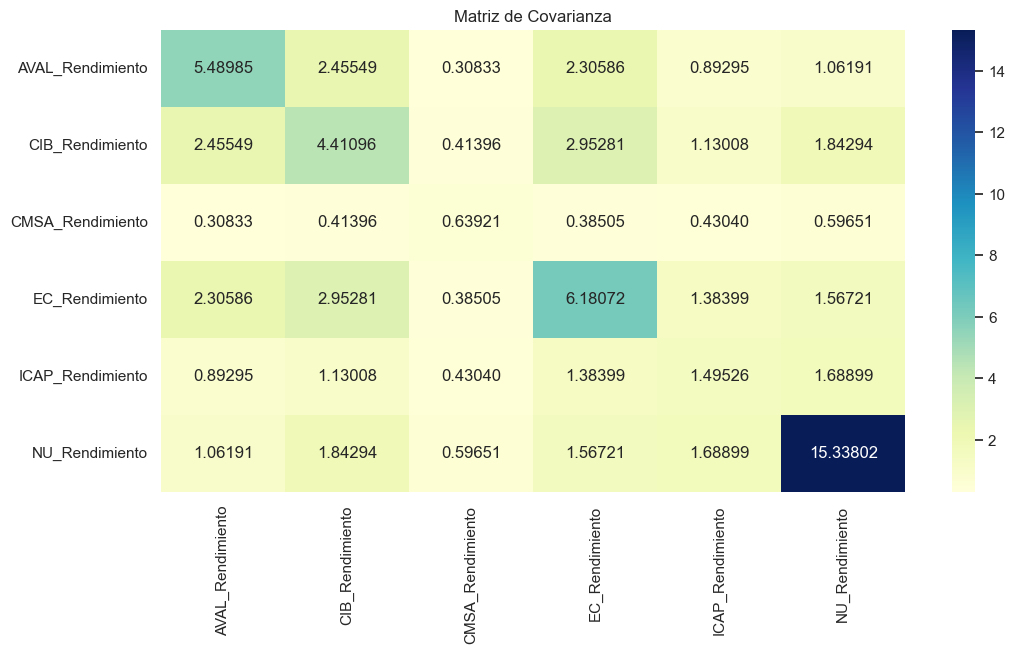

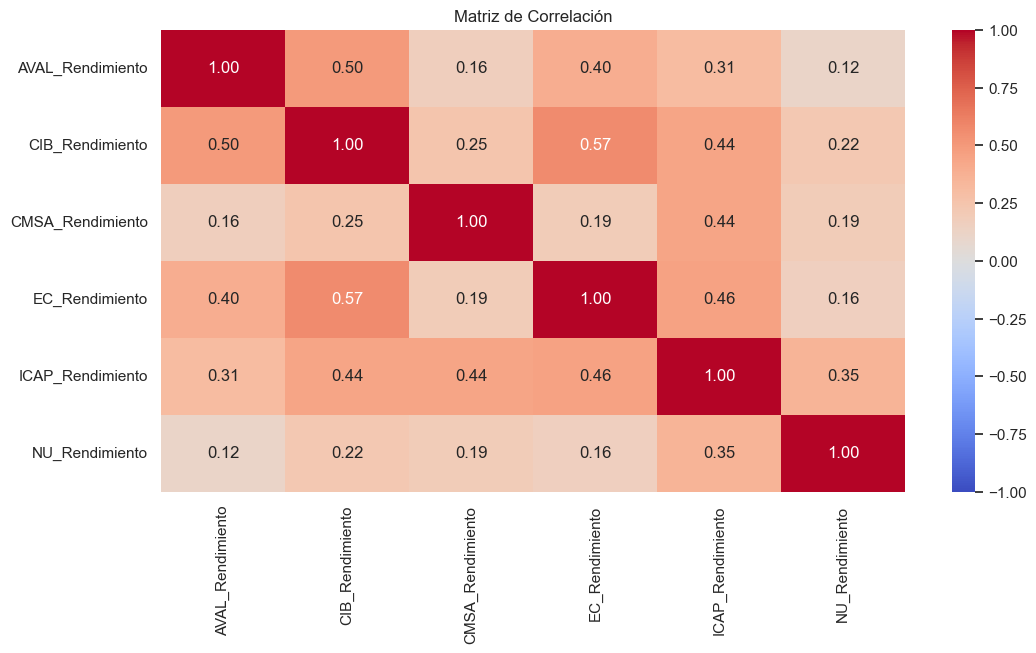

In [12]:
#Grafica matriz covarianza y de correlaciones
plt.figure(figsize=(12, 6))
sns.heatmap(matriz_covarianza, annot=True, cmap="YlGnBu", fmt=".5f")
plt.title("Matriz de Covarianza")
plt.show()

plt.figure(figsize=(12, 6))
sns.heatmap(matriz_correlacion, annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1)
plt.title("Matriz de Correlación")
plt.show()
